In [11]:
import math
import matplotlib.pyplot as plt

from numpy import *

In [24]:
def model(iterations, P0, N0, l=2, a=0.068, c=1):
    result = []
    N_prev = N0
    P_prev = P0
    for i in range(iterations):
        P_initial = math.exp((-a) * P_prev)
        N = l * N_prev * P_initial
        P = c * N_prev * (1 - P_initial)
        result.append([N, P])
        N_prev = N
        P_prev = P
    return result

In [75]:
def plot_populations(result):
    ll = plt.plot(result)
    xl = plt.xlabel('time')
    yl = plt.ylabel('populations')
    plt.show()

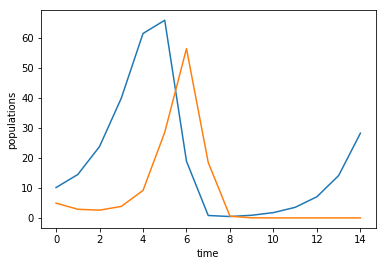

In [76]:
result = model(15, 10, 10)
plot_populations(result)

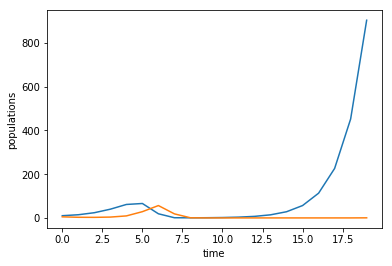

In [77]:
result = model(20, 10, 10)
plot_populations(result)

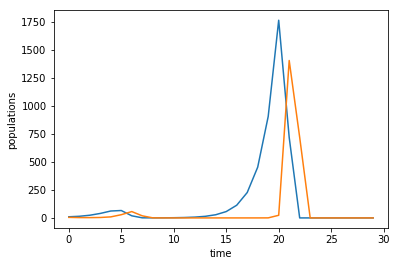

In [79]:
result = model(30, 10, 10)
plot_populations(result)

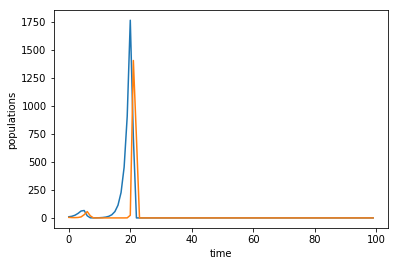

In [82]:
result = model(100, 10, 10)
plot_populations(result)

От тук виждаме **неустойчивата равновесна точка** около която има трептения.

Също така забелязваме, че **популацията ни е около 0**. Което не е "биологически" логично.
Получава се така, защото без паразитоида, популацията на гостоприемника ще расте до безкрай (всички променливи във формулата за N са > 0).

Сега ще модифицираме модела, така че популацията на гостоприемника да зависи от **капацитета на средата**, в която живее. Ще използваме логистична функция за функция на капацитета:

In [93]:
def model_improved(iterations, P0, N0, K, r=1, a=0.068, c=1):
    result = []
    N_prev = N0
    P_prev = P0
    for i in range(iterations):
        l = math.exp(r * (1 - N_prev / K)) # l вече е функция зависеща от капацитета на средата
        P_initial = math.exp((-a) * P_prev)
        N = l * N_prev * P_initial
        P = c * N_prev * (1 - P_initial)
        result.append([N, P])
        N_prev = N
        P_prev = P
    return result

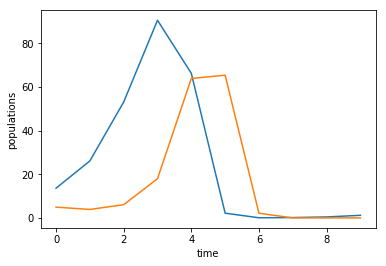

In [94]:
result = model_improved(10, 10, 10, 1000)
plot_populations(result)

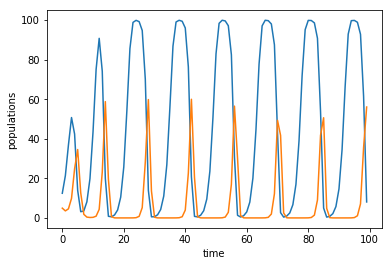

In [97]:
result = model_improved(100, 10, 10, 100)
plot_populations(result)

Тук се забелязва някаква цикличност на популациите.

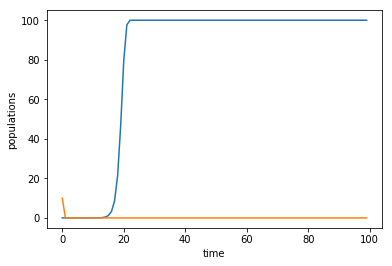

In [107]:
result = model_improved(100, 10, 10, 100, a=0.9, c=1)
plot_populations(result)

При много голям шанс (a=90%) да се срещнат паразитоида и гостоприемника и снасяне на 1 яйце (c=1) виждаме, че паразоида е много лаком, изчерпва си ресурсите и умира, а популацията на гостоприемника нараства до капацитета на средата.

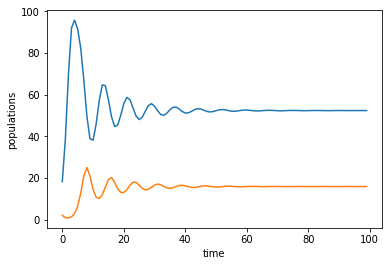

In [109]:
result = model_improved(100, 10, 10, 100, a=0.03, c=0.8)
plot_populations(result)

При малка вероятност да се срещнат и по-малко средно снасят яйца паразитоидите, двете популации се стабилизират около някакви точки. Защото има достатъчно ресурси и за двете популации.

In [ ]:
яяя